<a href="https://colab.research.google.com/github/prissyyy/Tugas-Kuliah-Prissy/blob/main/13_LSTM%26GRU(Time_Series_Non_Linier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#import Package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# importing libraries

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
# function which plots ibm stock prices: real and predicted both

def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real IBM stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("IBM stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

In [4]:
# function which calculates root mean squared error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/prissyyy/Tugas-Kuliah-Prissy/main/Dataset/Stock.csv", index_col='Date', parse_dates=["Date"])

data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,56.45,56.66,55.46,56.53,3716500,UTX
2006-01-04,56.80,56.80,55.84,56.19,3114500,UTX
2006-01-05,56.30,56.49,55.63,55.98,3118900,UTX
2006-01-06,56.45,56.67,56.10,56.16,2874300,UTX
2006-01-09,56.37,56.90,56.16,56.80,2467200,UTX
...,...,...,...,...,...,...
2017-12-22,127.52,127.60,126.95,127.23,1604455,UTX
2017-12-26,127.45,127.94,126.99,127.14,1053109,UTX
2017-12-27,127.46,127.61,126.92,127.58,1810839,UTX


In [6]:
#processing Data
train = data[:'2016'].iloc[:,1:2].values
test = data['2017':].iloc[:,1:2].values

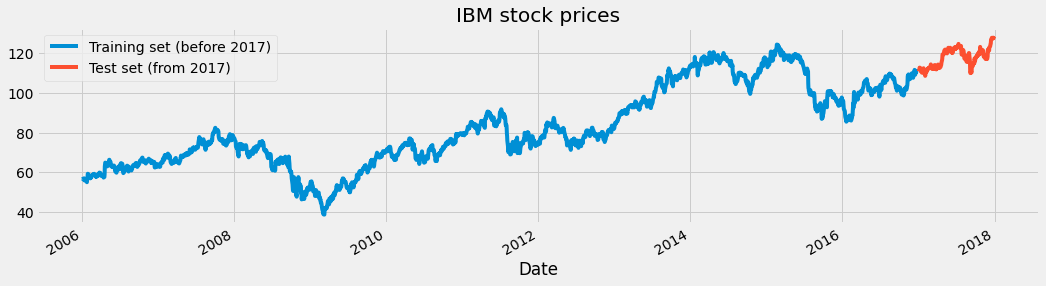

In [7]:
# visualization of "High" attribute of the dataset

data["High"][:'2016'].plot(figsize=(16,4), legend=True)
data["High"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("IBM stock prices")
plt.show()

In [8]:
# scaling the training set

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [9]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements

x_train = []
y_train = []

for i in range(60,2769):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train[0]

array([0.20898483, 0.21061844, 0.20700117, 0.20910152, 0.2117853 ,
       0.21318553, 0.21026838, 0.20035006, 0.20070012, 0.20688448,
       0.20746791, 0.20490082, 0.20198366, 0.19054842, 0.20980163,
       0.21295216, 0.21936989, 0.24025671, 0.23395566, 0.23605601,
       0.2344224 , 0.22928821, 0.2243874 , 0.21715286, 0.21551925,
       0.21306884, 0.21400233, 0.21831972, 0.21831972, 0.22870478,
       0.22917153, 0.22847141, 0.22952159, 0.23558926, 0.2361727 ,
       0.23570595, 0.23803967, 0.23978996, 0.23803967, 0.23733956,
       0.23418903, 0.23243874, 0.22403734, 0.22975496, 0.22555426,
       0.22112019, 0.22718786, 0.22800467, 0.22998833, 0.22753792,
       0.23232205, 0.23827305, 0.23512252, 0.23512252, 0.23990665,
       0.23908985, 0.24725788, 0.2411902 , 0.24504084, 0.23803967])

In [11]:
y_train[0]

0.23208868144690786

In [12]:
len(x_train)

2709

In [13]:
len(y_train)

2709

In [14]:
x_train.shape

(2709, 60)

In [15]:
y_train.shape

(2709,)

In [16]:
# reshaping x_train for efficient modelling

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
x_train.shape

(2709, 60, 1)

In [18]:
# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

In [19]:
# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit to the training set

regressor.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
85/85 [==============================] - 17s 113ms/step - loss: 0.0243
Epoch 2/5
85/85 [==============================] - 10s 120ms/step - loss: 0.0101
Epoch 3/5
85/85 [==============================] - 10s 115ms/step - loss: 0.0086
Epoch 4/5
85/85 [==============================] - 11s 132ms/step - loss: 0.0070
Epoch 5/5
85/85 [==============================] - 10s 111ms/step - loss: 0.0057


In [20]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2016'], data['High']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(3020,)
(311,)
(311, 1)
(311, 1)


In [21]:
# preparing x_test

x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# predicting the stock prices for test set

predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

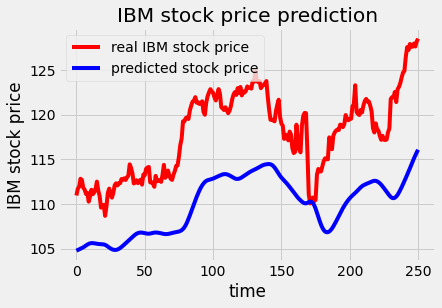

In [23]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [24]:
# evaluating the model

return_rmse(test, predicted)

the root mean squared error is : 8.298187981916804.


In [25]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [26]:
# compiling the model

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
19/19 [==============================] - 10s 207ms/step - loss: 0.1143
Epoch 2/5
19/19 [==============================] - 4s 207ms/step - loss: 0.0386
Epoch 3/5
19/19 [==============================] - 4s 207ms/step - loss: 0.0224
Epoch 4/5
19/19 [==============================] - 4s 206ms/step - loss: 0.0074
Epoch 5/5
19/19 [==============================] - 5s 273ms/step - loss: 0.0038


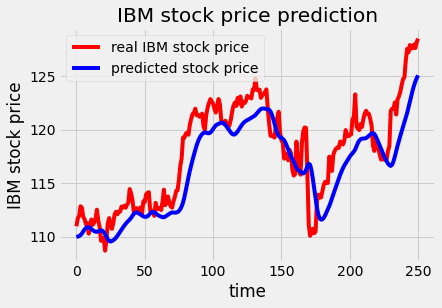

In [27]:
# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

In [28]:
# evaluating the model performance

return_rmse(test, predicted_with_gru)

the root mean squared error is : 2.53796103010478.
